In [1]:
%matplotlib inline


### 🗄️Data Source
Californina housing data from the 1990 census.  

### 🎯Goal
Build a model of housing prices in California using the California census data.

### 📝Checklist
#### Frame the Problem and Look at the Big Picture
1. Define the objective in business terms.
2. How will your solution be used?
3. What are the current solutions/workarounds (if any)?
4. How should you frame this problem (supervised/unsupervised, online/offline,
etc.)?
5. How should performance be measured?
6. Is the performance measure aligned with the business objective?
7. What would be the minimum performance needed to reach the business objective?
8. What are comparable problems? Can you reuse experience or tools?
9. Is human expertise available?
10. How would you solve the problem manually?
11. List the assumptions you (or others) have made so far.
12. Verify assumptions if possible.

#### Get the Data
Note: automate as much as possible so you can easily get fresh data.
1. List the data you need and how much you need.
2. Find and document where you can get that data.
3. Check how much space it will take.
4. Check legal obligations, and get authorization if necessary.
5. Get access authorizations.
6. Create a workspace (with enough storage space).
7. Get the data.
8. Convert the data to a format you can easily manipulate (without changing the
data itself).
9. Ensure sensitive information is deleted or protected (e.g., anonymized).
10. Check the size and type of data (time series, sample, geographical, etc.).
11. Sample a test set, put it aside, and never look at it (no data snooping!).

#### Explore the Data
Note: try to get insights from a field expert for these steps.
1. Create a copy of the data for exploration (sampling it down to a manageable size
if necessary).
2. Create a Jupyter notebook to keep a record of your data exploration.
3. Study each attribute and its characteristics:
• Name
• Type (categorical, int/float, bounded/unbounded, text, structured, etc.)
• % of missing values
• Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)
• Usefulness for the task
• Type of distribution (Gaussian, uniform, logarithmic, etc.)
4. For supervised learning tasks, identify the target attribute(s).
5. Visualize the data.
6. Study the correlations between attributes.
7. Study how you would solve the problem manually.
8. Identify the promising transformations you may want to apply.
9. Identify extra data that would be useful (go back to “Get the Data” on page 756).
10. Document what you have learned.

#### Prepare the Data
Notes:
• Work on copies of the data (keep the original dataset intact).
• Write functions for all data transformations you apply, for five reasons:
—So you can easily prepare the data the next time you get a fresh dataset
—So you can apply these transformations in future projects
—To clean and prepare the test set
—To clean and prepare new data instances once your solution is live
—To make it easy to treat your preparation choices as hyperparameters
1. Data cleaning:
• Fix or remove outliers (optional).
• Fill in missing values (e.g., with zero, mean, median…) or drop their rows (or
columns).
2. Feature selection (optional):
• Drop the attributes that provide no useful information for the task.
3. Feature engineering, where appropriate:
• Discretize continuous features.
• Decompose features (e.g., categorical, date/time, etc.).
• Add promising transformations of features (e.g., log(x), sqrt(x), x2, etc.).
• Aggregate features into promising new features.
4. Feature scaling:
• Standardize or normalize features.

#### Shortlist Promising Models
Notes:
• If the data is huge, you may want to sample smaller training sets so you can train
many different models in a reasonable time (be aware that this penalizes complex
models such as large neural nets or Random Forests).
• Once again, try to automate these steps as much as possible.
1. Train many quick-and-dirty models from different categories (e.g., linear, naive
Bayes, SVM, Random Forest, neural net, etc.) using standard parameters.
2. Measure and compare their performance.
• For each model, use N-fold cross-validation and compute the mean and standard
deviation of the performance measure on the N folds.
3. Analyze the most significant variables for each algorithm.
4. Analyze the types of errors the models make.
• What data would a human have used to avoid these errors?
5. Perform a quick round of feature selection and engineering.
6. Perform one or two more quick iterations of the five previous steps.
7. Shortlist the top three to five most promising models, preferring models that
make different types of errors.

#### Fine-Tune the System
Notes:
• You will want to use as much data as possible for this step, especially as you move
toward the end of fine-tuning.
• As always, automate what you can.
1. Fine-tune the hyperparameters using cross-validation:
• Treat your data transformation choices as hyperparameters, especially when
you are not sure about them (e.g., if you’re not sure whether to replace missing
values with zeros or with the median value, or to just drop the rows).
• Unless there are very few hyperparameter values to explore, prefer random
search over grid search. If training is very long, you may prefer a Bayesian
optimization approach (e.g., using Gaussian process priors, as described by
Jasper Snoek et al.).1
2. Try Ensemble methods. Combining your best models will often produce better
performance than running them individually.
3. Once you are confident about your final model, measure its performance on the
test set to estimate the generalization error.

#### Present Your Solution
1. Document what you have done.
2. Create a nice presentation.
• Make sure you highlight the big picture first.
3. Explain why your solution achieves the business objective.
4. Don’t forget to present interesting points you noticed along the way.
• Describe what worked and what did not.
• List your assumptions and your system’s limitations.
5. Ensure your key findings are communicated through beautiful visualizations or
easy-to-remember statements (e.g., “the median income is the number-one predictor
of housing prices”).

#### Launch!
1. Get your solution ready for production (plug into production data inputs, write
unit tests, etc.).
2. Write monitoring code to check your system’s live performance at regular intervals
and trigger alerts when it drops.
• Beware of slow degradation: models tend to “rot” as data evolves.
• Measuring performance may require a human pipeline (e.g., via a crowdsourcing
service).
• Also monitor your inputs’ quality (e.g., a malfunctioning sensor sending random
values, or another team’s output becoming stale). This is particularly
important for online learning systems.
3. Retrain your models on a regular basis on fresh data (automate as much as
possible)

In [2]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
    

In [3]:
import pandas as pd

def load_housing_data(path = HOUSING_PATH):
    csv_path = os.path.join(path, "housing.csv")
    return pd.read_csv(csv_path)


In [4]:
fetch_housing_data()
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


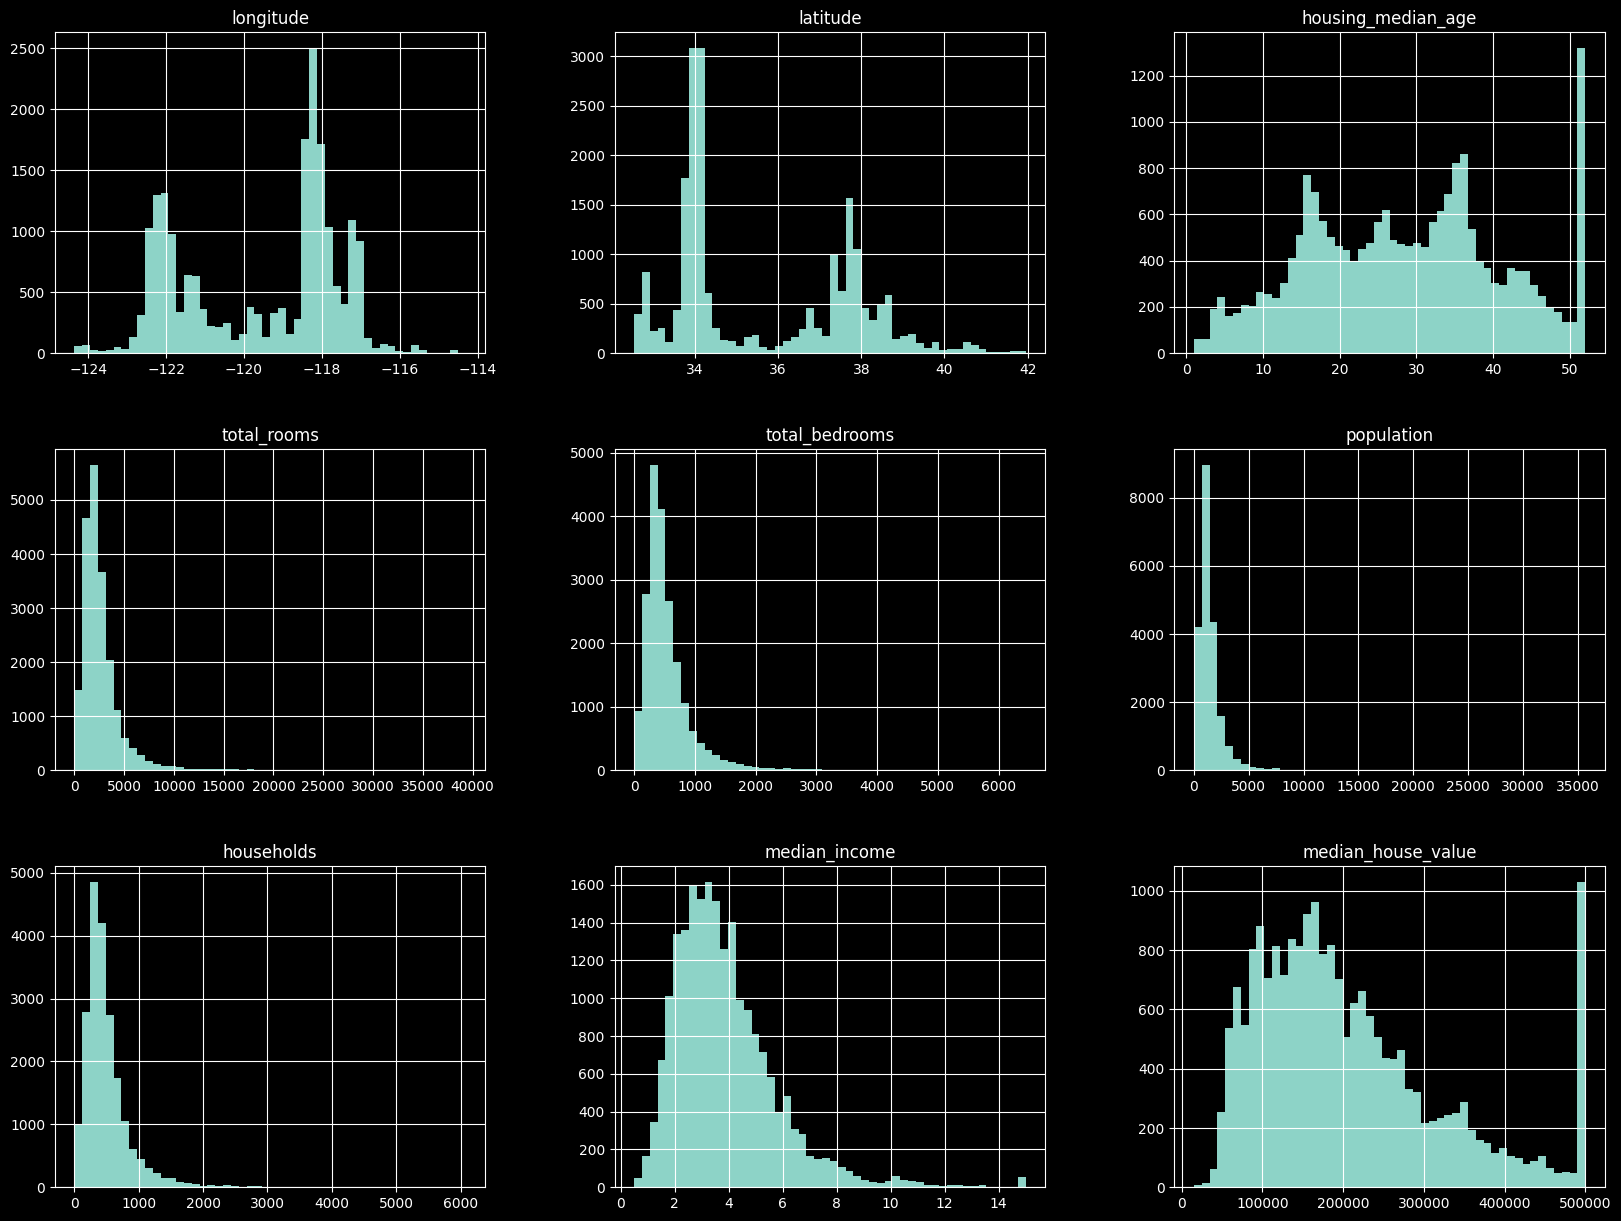

In [8]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")
housing.hist(bins=50, figsize=(20,15))

#plt.show()

def plot_with_loop():
    
    
    plt.figure(figsize=(40, 30))
    plt.hist(housing["longitude"], bins=50)
    plt.xlabel("Longitude")
    plt.ylabel("Frequency")
    plt.title("Histogram of Longitude")  
    plt.show()
    
#plot_with_loop()

## Creating Test data

In [9]:
import numpy as np
# Simple way

def split_train_test(data: pd.array, test_ratio: float) -> (pd.array, pd.array):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

# Seeded way

def split_train_test_seeded(data: pd.array, test_ratio: float, seed= 42) -> (pd.array, pd.array):
    np.random.seed(seed)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

# CI-CD, make a way so that on continous download the process still works, TO-Do round 2




In [10]:
train, test = split_train_test_seeded(housing, 0.2)
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


Stratfied Sampling

In [12]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=["v.low","low","med","high","v.high"])

<Axes: >

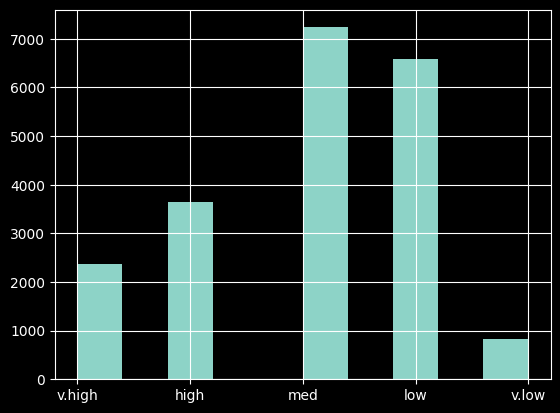

In [13]:
housing["income_cat"].hist()

<Axes: >

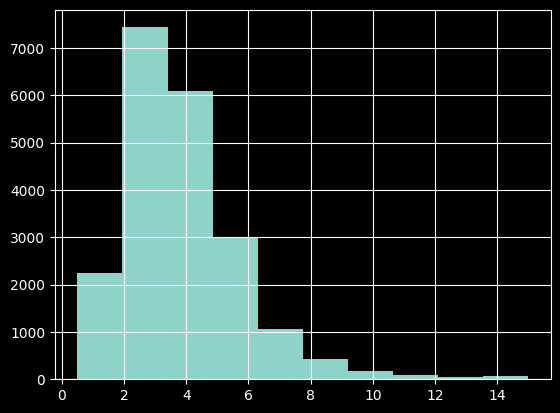

In [14]:
housing["median_income"].hist()

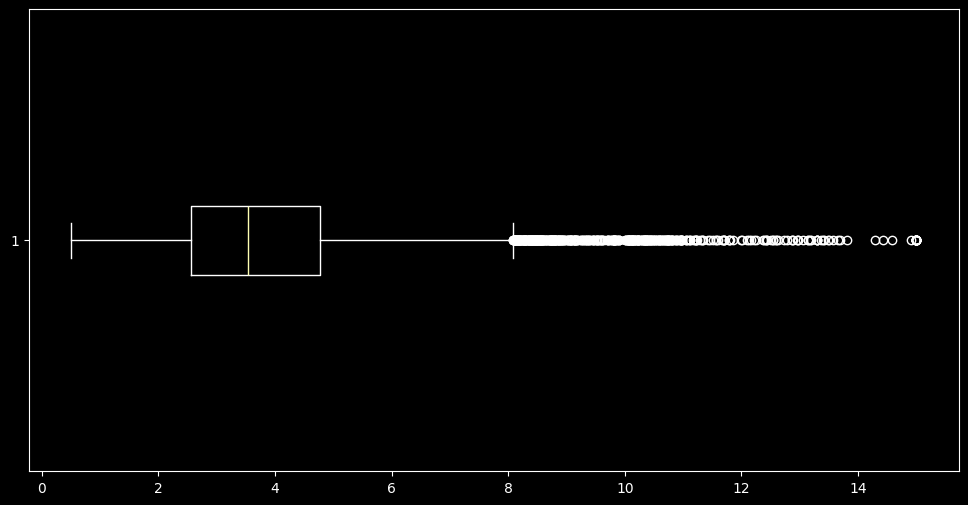

In [17]:
plt.figure(figsize=(12, 6))
plt.boxplot(train["median_income"], vert=False)
plt.show()

hence above distribution seems to be more saturated towards the left and is not a standard normal distribution, more like an log normal distribution. Hence we will use stratified sampling to get a better representation of the data. 

# Stratified Sampling

So herin we want to create a test set that is representative of the overall population. We want to ensure that the test set is representative of the various categories of incomes in the whole dataset. Since the median income is a continuous numerical attribute, we first need to create an income category attribute. Let's look at the median income histogram more closely:

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

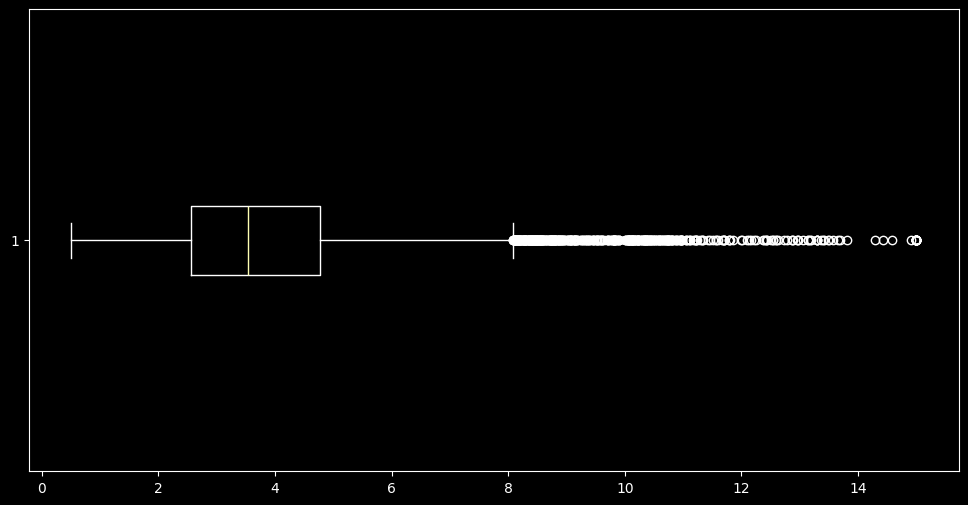

In [18]:
plt.figure(figsize=(12, 6))
plt.boxplot(train["median_income"], vert=False)
plt.show()

<Axes: >

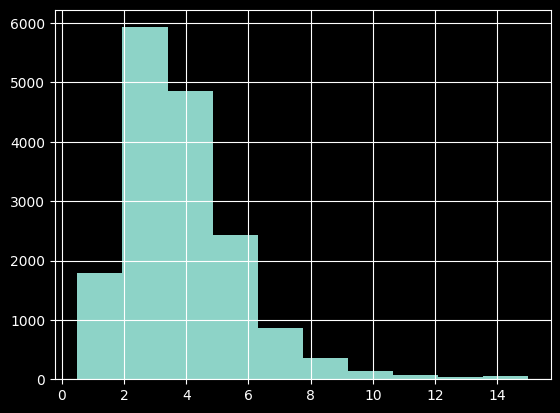

In [20]:
train["median_income"].hist()